<a href="https://colab.research.google.com/github/BrilliantChard/K-Nearest-Neighbor/blob/main/Salary_Estimation_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
salary_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salary.csv')
salary_data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [7]:
salary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salary.csv', index_col='age')
salary.head()

,education.num,capital.gain,hours.per.week,income
age,,,,
90,9,0,40,<=50K
82,9,0,18,<=50K
66,10,0,40,<=50K
54,4,0,40,<=50K
41,10,0,40,<=50K


Text(0.5, 1.0, 'Barplot showing Age and Income')

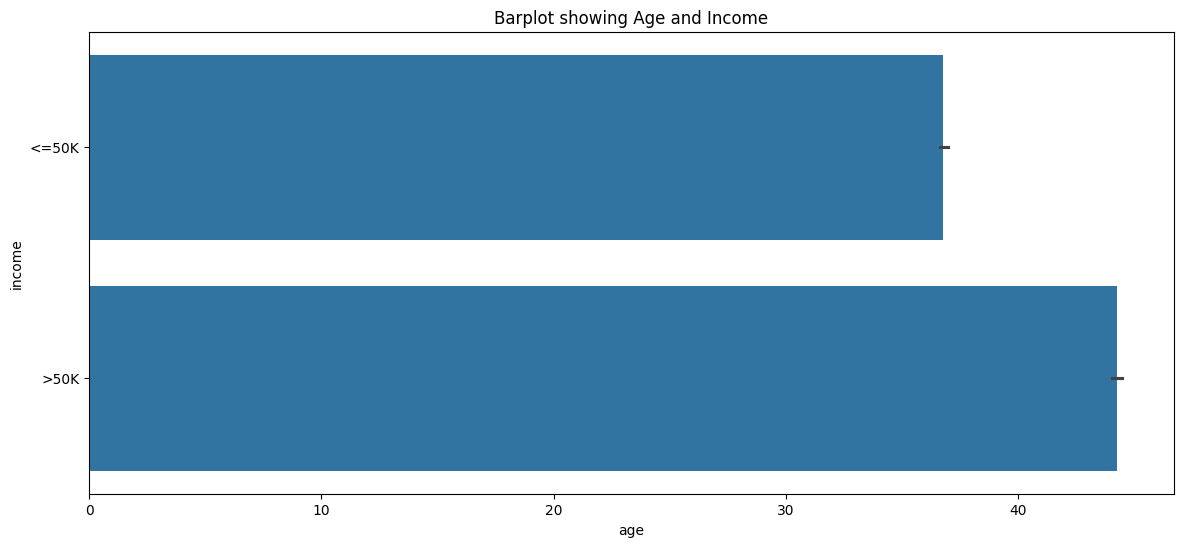

In [10]:
plt.figure(figsize=(14, 6))

sns.barplot(x = salary.index, y = salary['income'])
plt.title('Barplot showing Age and Income')

In [11]:
salary_data.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

In [12]:
salary_data.isnull().sum()

,0
age,0
education.num,0
capital.gain,0
hours.per.week,0
income,0


In [13]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [14]:
Income = pd.get_dummies(salary_data['income'], drop_first=True)
data = pd.concat([salary_data, Income], axis=1)

In [15]:
data.drop(['income'], axis=1, inplace=True )

In [16]:
data.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', '>50K'], dtype='object')

In [18]:
x=data[['age', 'education.num', 'capital.gain', 'hours.per.week']]
y = data['>50K']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaler.fit(x)

StandardScaler()

In [21]:
scaled_features = scaler.transform(x)
scaled_features

array([[ 3.76961234, -0.42005962, -0.14592048, -0.03542945],
       [ 3.18311167, -0.42005962, -0.14592048, -1.81720429],
       [ 2.01011032, -0.03136003, -0.14592048, -0.03542945],
       ...,
       [ 0.10398314, -0.42005962, -0.14592048, -0.03542945],
       [ 1.42360965, -0.42005962, -0.14592048, -0.03542945],
       [-1.21564337, -0.42005962, -0.14592048, -1.65522476]])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
pred = knn.predict(x_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
confusion_matrix(pred, y_test)

array([[4211,  796],
       [ 765,  741]])

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.84      0.85      0.84      4976
        True       0.49      0.48      0.49      1537

    accuracy                           0.76      6513
   macro avg       0.67      0.66      0.67      6513
weighted avg       0.76      0.76      0.76      6513



In [32]:
import numpy as np

In [34]:
new_data = np.array([[35, 12, 5000, 40]])

In [35]:
scaled_new_data = scaler.transform(new_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
scaled_new_data

array([[-0.26257978,  0.74603917,  0.53111121, -0.03542945]])

In [40]:
predicted_income = knn.predict(scaled_new_data)
print(f"Predicted Income Category: {predicted_income[0]}")

Predicted Income Category: False


In [41]:
# Mapping boolean to string label

label_map = {True: '>50K', False: '<=50K'}
predicted_label = label_map[predicted_income[0]]

In [42]:
predicted_label

'<=50K'

In [44]:
data.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', '>50K'], dtype='object')

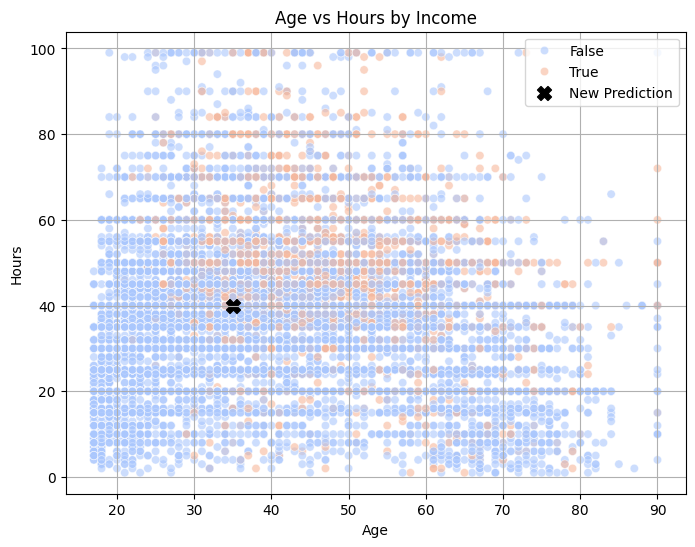

In [48]:
age = new_data[0][0]
hours = new_data[0][3]
# Add new point to plot

plt.figure(figsize=(8,6))
sns.scatterplot(data, x='age', y='hours.per.week', hue='>50K', palette='coolwarm', alpha=0.6)

# Plot new point
plt.scatter(age, hours, color='black', s=100, marker='X', label='New Prediction')

plt.title('Age vs Hours by Income')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.legend()
plt.grid(True)
plt.show()